In [1]:
import synthx as sx

### sensitivity check

In [2]:
df = sx.sample(
    n_units=20,
    n_time=50,
    n_observed_covariates=3,
    n_unobserved_covariates=10,
    intervention_units=[1, 2, 3, 4, 5],
    intervention_time=40,
    intervention_effect=1,
    noise_effect=0.5,
    scale=2,
    seed=42,
)

In [3]:
dataset = sx.Dataset(
    df,
    unit_column = 'unit',
    time_column = 'time',
    y_column = 'y',
    covariate_columns=['covariate_1', 'covariate_2', 'covariate_3'],
    intervention_units=[1, 2, 3, 4, 5],
    intervention_time=40,
)

In [4]:
effects_test, effects_placebo, sc_test, scs_placebo = sx.placebo_test(dataset)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 220.16it/s]


In [5]:
sx.stats.calc_p_value(effects_test, effects_placebo)

0.7858439978833215

In [6]:
sx.sensitivity_check(dataset, effects_placebo, r=1.05, write_progress=True)

uplift: 1.0250, p value: 0.25730883245626884.
uplift: 1.0375, p value: 0.07486860411949839.
uplift: 1.0438, p value: 0.03714697905151708.
uplift: 1.0453, p value: 0.030969874860821332.
6it [00:07,  1.19s/it, uplift=1.0461]


1.04609375

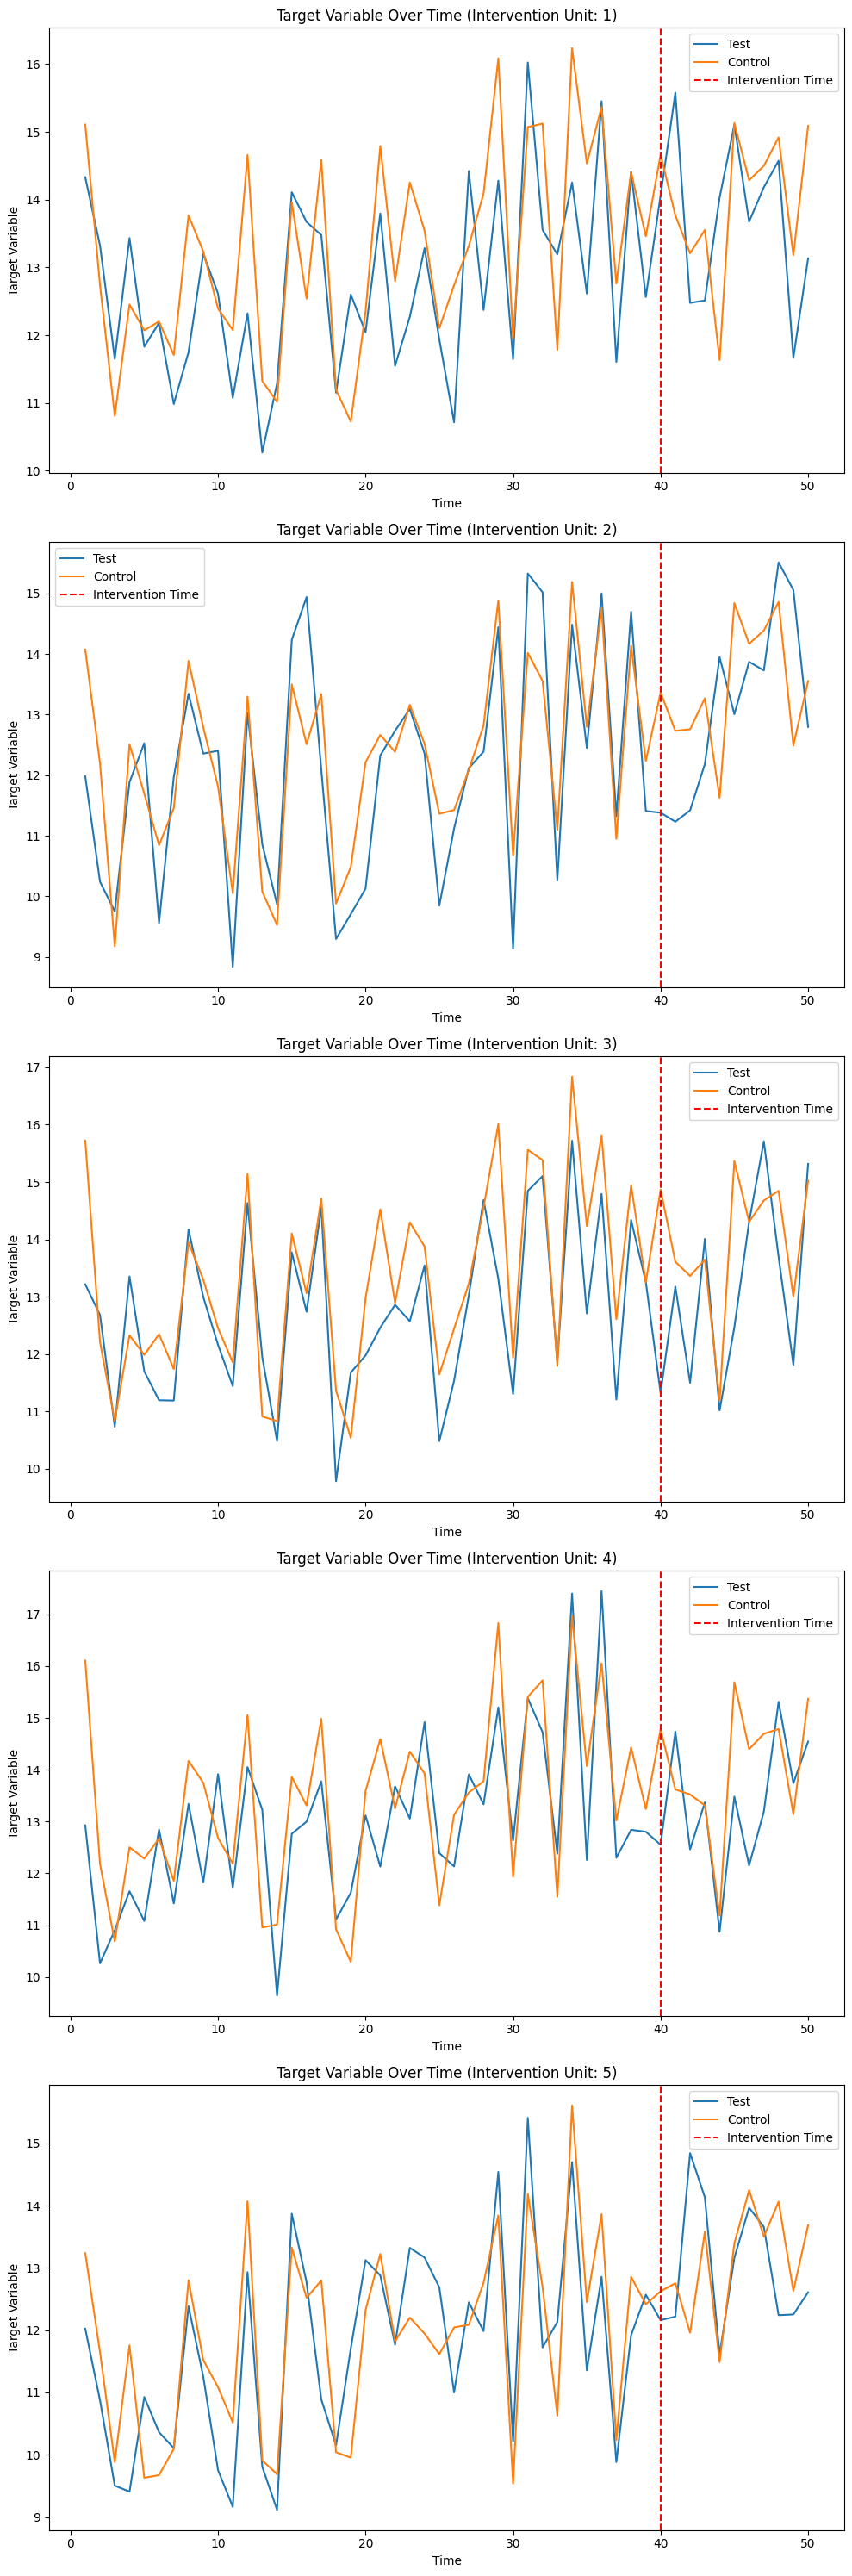

In [7]:
sc_test.plot()